In [86]:
from yolo3_one_file_to_detect_them_all import (WeightReader, make_yolov3_model, decode_netout, draw_boxes,
correct_yolo_boxes, do_nms, preprocess_input)
from numpy import expand_dims
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import cv2
import matplotlib.pyplot as plt

In [139]:
# get all of the results above a threshold
def get_boxes_v2(boxes, labels, thresh):
	v_boxes, v_labels, v_scores = list(), list(), list()
	# enumerate all boxes
	for box in boxes:
		# enumerate all possible labels
		for i in range(len(labels)):
			# check if the threshold for this label is high enough
			if box.classes[i] > thresh:
				v_boxes.append(box)
				v_labels.append(labels[i])
				v_scores.append(box.classes[i]*100)
				# don't break, many labels may trigger for one box
	return v_boxes, v_labels, v_scores

In [65]:
model = make_yolov3_model()
weight_reader = WeightReader('model_data/yolov3.weights')

In [66]:
weight_reader.load_weights(model)

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

In [44]:
model.save('model.h5')

In [166]:
# load yolov3 model and perform object detection
# based on https://github.com/experiencor/keras-yolo3
 
# load and prepare an image
def load_image_pixels(filename, shape):
    # load the image to get its shape
    image = load_img(filename)
    width, height = image.size
    # load the image with the required size
    image = load_img(filename, target_size=shape)
    # convert to numpy array
    image = img_to_array(image)
    # scale pixel values to [0, 1]
    image = image.astype('float32')
    image /= 255.0
    # add a dimension so that we have one sample
    image = expand_dims(image, 0)
    return image, width, height
 
# load yolov3 model
model = load_model('ball')


Tensor("conv_105_10/BiasAdd:0", shape=(None, None, None, 18), dtype=float32)
[(1, 13, 13, 18), (1, 26, 26, 18), (1, 52, 52, 18)]


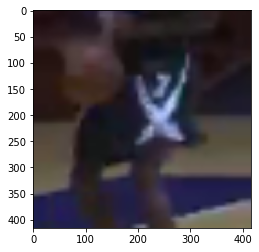

In [185]:
# define the expected input shape for the model
input_w, input_h = 60, 60
net_w, net_h = 416, 416

print(model.outputs[-1])

# define our new photo
photo_filename = '/Users/tonylambropoulos/projects/keras-yolo3/orig_images/9.png'
# load and prepare image
orig_image = cv2.imread(photo_filename)
image = preprocess_input(orig_image, net_h, net_w)
# make prediction
yhat = model.predict(image)
# summarize the shape of the list of arrays
print([a.shape for a in yhat])
plt.imshow(image[0,:,:,:])

In [186]:
anchors = [[116,90,  156,198,  373,326],  [30,61, 62,45,  59,119], [10,13,  16,30,  33,23]]
# define the probability threshold for detected objects
class_threshold = 0.20
boxes = list()
for i in range(len(yhat)):
    # decode the output of the network
    boxes += decode_netout(yhat[i][0], anchors[i], class_threshold,0.8, net_h, net_w)
print([(b.get_label(), b.get_score(), b.xmin, b.ymax) for b in boxes if b.get_score() > 0])

[(0, 0.24974135, 0.7493902322155639, 0.14445226233915465)]


In [187]:
correct_yolo_boxes(boxes, input_h, input_w, net_h, net_w)
print([(b.get_label(), b.get_score(), b.xmin, b.xmax, b.ymin, b.ymax) for b in boxes if b.get_score() > 0])

[(0, 0.24974135, 44, 70, 2, 8)]


In [188]:
labels = ["ball"]
do_nms(boxes, 0.8)

In [189]:
res = draw_boxes(orig_image, boxes, labels, class_threshold)

ball: 24.97413456439972%


In [190]:
cv2.imwrite("zebra_det.jpg", res)

True